# Rolling the DICE in metaanalysis

Our project is titled **Rolling the DICE in metaanalysis** and is about determining the functional form of the damage function in William D. Nordhaus's new 2023-version of the Dynamic Integrated Climate-Economy model (DICE). We find the functional form through a metanalysis of studies from leading climate-economy experts. The datapoints from these studies have been summarized in Nordhaus' own metaanalysis as well as in Richard Tol's metaanalysis. The datapoints consists of increases in global temperature above the mean in 1920 and the corresponding loss in global GDP. We test several functional forms on the metaanalysis data through a regression analysis using OLS. We find significant results for a linear, hyperbolic sinus, quadratic and exponentiel function form. However, we choose conclude that only the quadratic and exponentiel functional forms are reasonable, since the damages has to show convexity according to leading experts such as Simon Dietz (2015).

The **results** of the project can be seen from running [dataproject.ipynb](dataproject.ipynb).

We apply the **following datasets**:

1. NordhausD.csv (*source*) 
1. TolD.csv (*source*)


**Project set up**

In [7]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


## Importing data for global temperature and loss in global GDP from Nordhaus and Tol

In [8]:
Nordhaus =  'NordhausD.csv' 
pd.read_csv(Nordhaus).head(5)

,Study,Year,Temp (celsius),Impact (%)
0,Cline,1992,2.5,-1.10
1,Cline,1992,10.0,-6.00
2,Nordhaus a,1994,3.0,-1.33
3,Nordhaus b,1994,3.0,-3.60
4,Nordhaus b,1994,6.0,-10.40


In [4]:
Tol = 'TolD.csv' 
pd.read_csv(Tol).head(5)

,Study,Year,Temp (celsius),Impact (%)
0,d'Arge,1979,-1.0,-0.60
1,Nordhaus,1982,2.5,-3.00
2,Nordhaus,1991,3.0,-1.00
3,Schauer,1995,2.5,-5.22
4,Plambeck and Hope,1996,2.5,-2.90


# Read and clean data

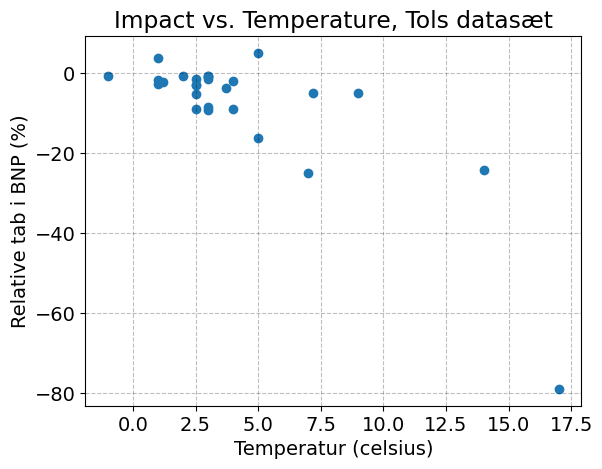

In [21]:
# Load the data from CSV file into a DataFrame)
data1 = pd.read_csv('TolD.csv')
# Assuming your CSV file has columns 'x' and 'y'
x = data1['Temp (celsius)']
y = data1['Impact (%)']

# Plot the data
plt.scatter(x, y)
plt.xlabel('Temperatur (celsius)')
plt.ylabel('Relative tab i BNP (%)')
plt.title('Impact vs. Temperature, Tols datasæt')
plt.grid(True)
plt.show()

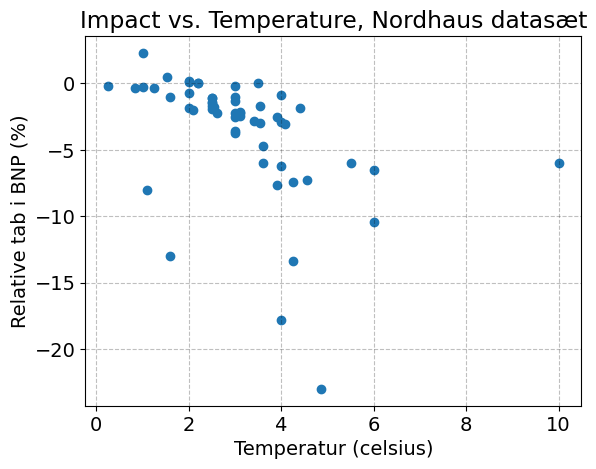

In [22]:
# Load the data from CSV file into a DataFrame)
data2 = pd.read_csv('NordhausD.csv')
# Assuming your CSV file has columns 'x' and 'y'
x = data2['Temp (celsius)']
y = data2['Impact (%)']

# Plot the data
plt.scatter(x, y)
plt.xlabel('Temperatur (celsius)')
plt.ylabel('Relative tab i BNP (%)')
plt.title('Impact vs. Temperature, Nordhaus datasæt')
plt.grid(True)
plt.show()

# Merge data sets

In [23]:
# Merge the two data sets: 
Total_data_set = pd.concat([data1, data2])

print(Total_data_set.head(5))
print(Total_data_set.describe())



               Study  Year  Temp (celsius)  Impact (%)
0             d'Arge  1979            -1.0       -0.60
1           Nordhaus  1982             2.5       -3.00
2           Nordhaus  1991             3.0       -1.00
3            Schauer  1995             2.5       -5.22
4  Plambeck and Hope  1996             2.5       -2.90
              Year  Temp (celsius)  Impact (%)
count    83.000000       83.000000   83.000000
mean   2009.771084        3.441289   -4.939518
std      10.006492        2.585807    9.900972
min    1979.000000       -1.000000  -78.900000
25%    2001.500000        2.200000   -6.000000
50%    2013.000000        3.000000   -2.200000
75%    2018.000000        4.000000   -1.010000
max    2021.000000       17.000000    5.100000


The output provides descriptive statistics for three columns: 'Year', 'Temp (celsius)', and 'Impact (%)'
There are a total of 83 observations in each of the three columns.
The mean for 'Temp (celsius)' it's around 3.44, and for 'Impact (%)' it's about -4.94.
The standard deviation for 'Year' is roughly 10.01, for 'Temp (celsius)' it's about 2.59, and for 'Impact (%)' it's approximately 9.90.

/Users/christianskinhoj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/christianskinhoj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/christianskinhoj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/christianskinhoj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

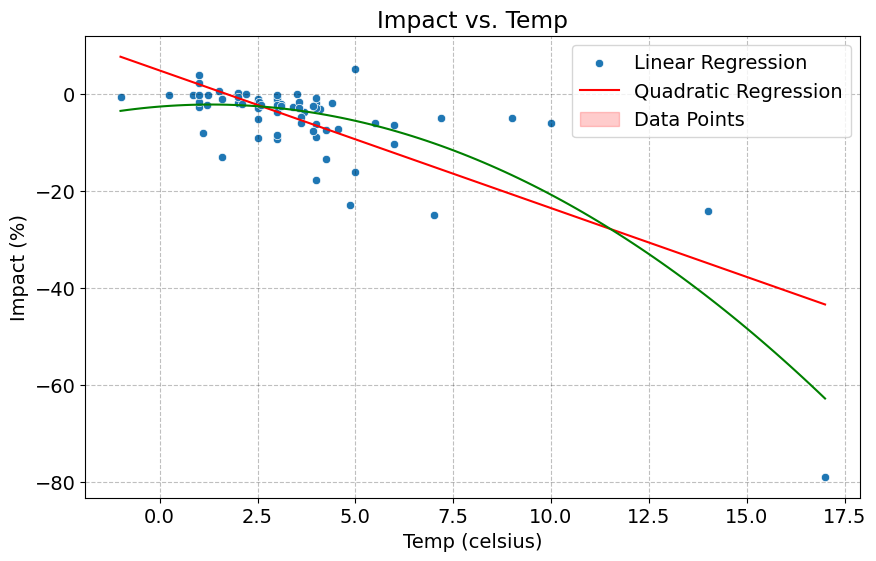

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Scatter plot af det samlede datasæt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temp (celsius)', y='Impact (%)', data=Total_data_set)

# Lineær regression
model_linear = LinearRegression()
X = Total_data_set['Temp (celsius)'].values.reshape(-1, 1)
y = Total_data_set['Impact (%)'].values
model_linear.fit(X, y)
sns.lineplot(x=Total_data_set['Temp (celsius)'], y=model_linear.predict(X), color='red')

# Kvadratisk regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model_quad = LinearRegression()
model_quad.fit(X_poly, y)
X_fit = np.linspace(Total_data_set['Temp (celsius)'].min(), Total_data_set['Temp (celsius)'].max(), 100)
X_fit_poly = poly.fit_transform(X_fit.reshape(-1, 1))
sns.lineplot(x=X_fit, y=model_quad.predict(X_fit_poly), color='green')

plt.title('Impact vs. Temp')
plt.xlabel('Temp (celsius)')
plt.ylabel('Impact (%)')
plt.legend(['Linear Regression', 'Quadratic Regression', 'Data Points'])
plt.grid(True)
plt.show()


In [26]:
import statsmodels.api as sm

# Lineær regression
X_constant = sm.add_constant(X)
model_linear_ols = sm.OLS(y, X_constant).fit()
print(model_linear_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     98.52
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           1.19e-15
Time:                        21:08:56   Log-Likelihood:                -274.53
No. Observations:                  83   AIC:                             553.1
Df Residuals:                      81   BIC:                             557.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8219      1.227      3.928      0.0

In [27]:
# Kvadratisk regression
X_poly_constant = sm.add_constant(X_poly)
model_quad_ols = sm.OLS(y, X_poly_constant).fit()
print(model_quad_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     86.28
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           1.07e-20
Time:                        21:09:02   Log-Likelihood:                -259.85
No. Observations:                  83   AIC:                             525.7
Df Residuals:                      80   BIC:                             533.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6155      1.643     -1.592      0.1

# Interpretation:

The OLS regression results indicate that the linear model has an R-squared value of 0.549, suggesting that approximately 54.9% of the variance in the impact can be explained by changes in temperature. The coefficient for temperature (x1) is statistically significant (p < 0.001), indicating a significant linear relationship between temperature and impact.

On the other hand, the quadratic model exhibits an improved R-squared value of 0.683, suggesting that approximately 68.3% of the variance in the impact can be explained by changes in temperature and its square. Both the linear term (x1) and the quadratic term (x2) are statistically significant (p < 0.001 for both), indicating a significant quadratic relationship between temperature and impact.

**Conclusion:**

While the linear model provides a significant relationship between temperature and impact, the quadratic model offers a better fit to the data, as indicated by its higher R-squared value. This suggests that there may indeed be a quadratic relationship between temperature and impact, which aligns with the expectation of convex damages, as emphasized by leading experts in the field. Therefore, the quadratic functional form is likely more scientifically plausible for modeling the relationship between temperature and impact in our meta-analysis.

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

In [ ]:
nordhaus_data = pd.read_csv('NordhausD.csv')

# Perform linear regression
X = nordhaus_data['Temp (celsius)']
X = sm.add_constant(X)  # Add a constant term to the predictor
y = nordhaus_data['Impact (%)']

model = sm.OLS(y, X).fit()  # Fit the linear regression model

# Print regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Impact (%)   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     13.79
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           0.000486
Time:                        14:29:48   Log-Likelihood:                -158.25
No. Observations:                  56   AIC:                             320.5
Df Residuals:                      54   BIC:                             324.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5934      1.250      0.